In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def process_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort the DataFrame by 'Date'
    df.sort_values('Date', inplace=True)

    # Forward fill the 'Net Worth' column
    df['Net Worth'] = df['Net Worth'].ffill()

    # Fill missing 'Action' values with 2
    df['Action'] = df['Action'].fillna(2)

    return df



In [3]:
# File paths
eth_file = 'net_worth_actions_ETH.csv'
ltc_file = 'net_worth_actions_LTC.csv'
xrp_file = 'net_worth_actions_XRP.csv'
btc_file = 'net_worth_actions_BTC.csv'

# Process each file
eth_df = process_file(eth_file)
ltc_df = process_file(ltc_file)
xrp_df = process_file(xrp_file)
btc_df = process_file(btc_file)

# Create a list of all unique dates from all DataFrames
all_dates = pd.to_datetime(list(set(eth_df['Date'].tolist() + ltc_df['Date'].tolist() + xrp_df['Date'].tolist() + btc_df['Date'].tolist())))

# Create a new DataFrame with all dates
combined_df = pd.DataFrame(all_dates, columns=['Date'])
combined_df.sort_values('Date', inplace=True)

# Merge the DataFrames on 'Date'
combined_df = pd.merge(combined_df, eth_df, on='Date', how='left', suffixes=('', '_ETH')).fillna(method='ffill')
combined_df = pd.merge(combined_df, ltc_df, on='Date', how='left', suffixes=('', '_LTC')).fillna(method='ffill')
combined_df = pd.merge(combined_df, xrp_df, on='Date', how='left', suffixes=('', '_XRP')).fillna(method='ffill')
combined_df = pd.merge(combined_df, btc_df, on='Date', how='left', suffixes=('', '_BTC')).fillna(method='ffill')

# Rename columns
combined_df.rename(columns={'Net Worth': 'Net Worth ETH', 'Action': 'Action ETH',
                            'Net Worth_LTC': 'Net Worth LTC', 'Action_LTC': 'Action LTC',
                            'Net Worth_XRP': 'Net Worth XRP', 'Action_XRP': 'Action XRP',
                            'Net Worth_BTC': 'Net Worth BTC', 'Action_BTC': 'Action BTC'}, inplace=True)

# Fill missing values in 'Action' columns with 2
combined_df[['Action ETH', 'Action LTC', 'Action XRP', 'Action BTC']] = combined_df[['Action ETH', 'Action LTC', 'Action XRP', 'Action BTC']].fillna(2)

In [4]:
backtestdata=combined_df.dropna()

In [5]:
backtestdata

,Date,Net Worth ETH,Action ETH,Net Worth LTC,Action LTC,Net Worth XRP,Action XRP,Net Worth BTC,Action BTC
1,2023-04-19 00:01:00,33632.030100,2.0,14483.748903,0.0,1406.647599,0.0,50477.571100,1.0
2,2023-04-19 00:02:00,33632.030100,2.0,14483.748903,0.0,1406.601722,0.0,50477.547998,0.0
3,2023-04-19 00:03:00,33632.030100,2.0,14483.748903,0.0,1406.506328,0.0,50477.541341,1.0
4,2023-04-19 00:04:00,33632.030100,2.0,14483.748903,0.0,1406.180869,0.0,50477.549336,0.0
5,2023-04-19 00:05:00,33632.030100,2.0,14483.748903,0.0,1406.438660,0.0,50477.556614,0.0
...,...,...,...,...,...,...,...,...,...
19142,2023-05-02 23:55:00,33825.144018,2.0,15314.527268,0.0,1375.201421,0.0,54320.361213,2.0
19143,2023-05-02 23:56:00,33825.073175,2.0,15320.663184,0.0,1374.217841,0.0,54333.508181,0.0
19144,2023-05-02 23:57:00,33823.904266,2.0,15304.115565,1.0,1374.942593,2.0,54333.508181,0.0
19145,2023-05-02 23:58:00,33823.904266,2.0,15304.115565,1.0,1373.234234,0.0,54335.010945,2.0


In [6]:
backtestdata['Total Worth'] = backtestdata['Net Worth ETH'] + backtestdata['Net Worth LTC'] + backtestdata['Net Worth XRP'] + backtestdata['Net Worth BTC']

In [7]:
backtestdata

,Date,Net Worth ETH,Action ETH,Net Worth LTC,Action LTC,Net Worth XRP,Action XRP,Net Worth BTC,Action BTC,Total Worth
1,2023-04-19 00:01:00,33632.030100,2.0,14483.748903,0.0,1406.647599,0.0,50477.571100,1.0,99999.997702
2,2023-04-19 00:02:00,33632.030100,2.0,14483.748903,0.0,1406.601722,0.0,50477.547998,0.0,99999.928724
3,2023-04-19 00:03:00,33632.030100,2.0,14483.748903,0.0,1406.506328,0.0,50477.541341,1.0,99999.826672
4,2023-04-19 00:04:00,33632.030100,2.0,14483.748903,0.0,1406.180869,0.0,50477.549336,0.0,99999.509208
5,2023-04-19 00:05:00,33632.030100,2.0,14483.748903,0.0,1406.438660,0.0,50477.556614,0.0,99999.774277
...,...,...,...,...,...,...,...,...,...,...
19142,2023-05-02 23:55:00,33825.144018,2.0,15314.527268,0.0,1375.201421,0.0,54320.361213,2.0,104835.233920
19143,2023-05-02 23:56:00,33825.073175,2.0,15320.663184,0.0,1374.217841,0.0,54333.508181,0.0,104853.462381
19144,2023-05-02 23:57:00,33823.904266,2.0,15304.115565,1.0,1374.942593,2.0,54333.508181,0.0,104836.470605
19145,2023-05-02 23:58:00,33823.904266,2.0,15304.115565,1.0,1373.234234,0.0,54335.010945,2.0,104836.265010


In [9]:
backtestdata.to_csv('Min Bar Balance.csv',index=None)

In [54]:
def calculate_financial_metrics(backtestdata,initial_value):
    
    net_worth_list=backtestdata['Total Worth'].values.tolist()
    
    backtestdata['Date']=pd.to_datetime(backtestdata['Date'])
    dates = backtestdata['Date']
    # Calculate the number of days
    num_days = (dates.max() - dates.min()).days + 1
    
    # Calculate daily returns
    returns_list = [(net_worth_list[i] - net_worth_list[i-1]) / net_worth_list[i-1] for i in range(1, len(net_worth_list))]
    returns = np.array(returns_list)

    # Calculate maximum drawdown
    rolling_max = np.maximum.accumulate(net_worth_list)
    daily_drawdown = net_worth_list / rolling_max - 1.0
    max_drawdown = np.min(daily_drawdown)

    # Calculate turnover rate
    # Calculate incremental changes in net worth for each asset
    backtestdata['Delta ETH'] = backtestdata['Net Worth ETH'].diff().abs()
    backtestdata['Delta LTC'] = backtestdata['Net Worth LTC'].diff().abs()
    backtestdata['Delta XRP'] = backtestdata['Net Worth XRP'].diff().abs()
    backtestdata['Delta BTC'] = backtestdata['Net Worth BTC'].diff().abs()

    # Sum the absolute changes for buys and sells (assuming each change is a transaction)
    total_transactions = backtestdata[['Delta ETH', 'Delta LTC', 'Delta XRP', 'Delta BTC']].sum().sum()

    # Initial Portfolio Value (assuming it's 100,000 as you mentioned)
    initial_portfolio_value = 100000

    # Compute the turnover rate as total transactions divided by initial portfolio value
    turnover_rate = total_transactions / initial_portfolio_value



    # Calculate total return
    total_return = (net_worth_list[-1] - initial_value) / initial_value

    # Calculate annualized total return
    annualized_total_return = total_return * 252 / num_days

    # Calculate average daily return and annualize it
    daily_return = returns.mean() * len(net_worth_list) / num_days
    annualized_daily_return = 252 * daily_return

    # Calculate annualized standard deviation (sigma)
    annualized_sigma = returns.std() * np.sqrt(252 * len(net_worth_list) / num_days)

    # Calculate risk-adjusted return (Sharpe ratio)
    sharpe_ratio = annualized_daily_return / annualized_sigma

    plt.figure(figsize=(12, 12))  # Adjust the size as per your preference

    # Plotting the net worth list
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
    plt.plot(dates,net_worth_list)
    plt.title("Net Worth Over Time")
    plt.xlabel("Time (Days)")
    plt.ylabel("Net Worth")

    # Plotting the drawdown
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
    plt.plot(dates,daily_drawdown)
    plt.title("Drawdown Over Time")
    plt.xlabel("Time (Days)")
    plt.ylabel("Drawdown")

    # Adjust layout for better spacing between plots
    plt.tight_layout()
    plt.show()

    # Creating a DataFrame for the metrics
    metrics = pd.DataFrame({
        'Metric': ['Annualized Total Return', 'Annualized Daily Return', 'Annualized Sigma', 'Sharpe Ratio', 'Max Drawdown', 'Turnover Rate'],
        'Value': [f"{round(annualized_total_return * 100, 4)}%", f"{round(annualized_daily_return * 100, 4)}%", 
                  f"{round(annualized_sigma * 100, 4)}%", f"{round(sharpe_ratio, 4)}", f"{round(max_drawdown * 100, 4)}%", f"{round(turnover_rate * 100, 4)}%"]
    })

    return metrics

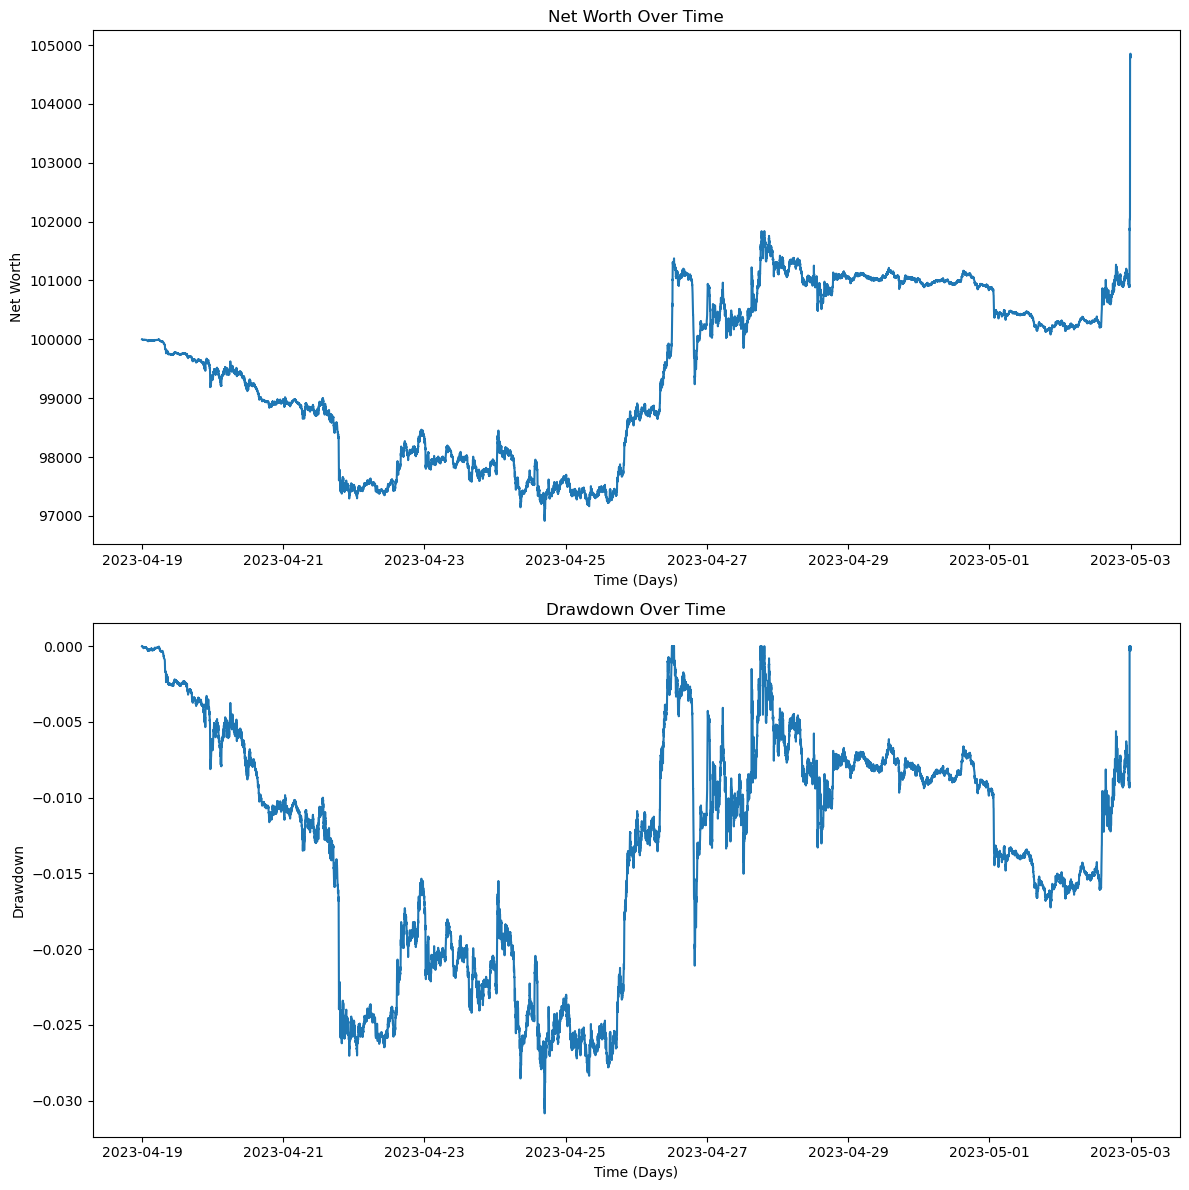

,Metric,Value
0,Annualized Total Return,86.8615%
1,Annualized Daily Return,86.1656%
2,Annualized Sigma,16.3701%
3,Sharpe Ratio,5.2636
4,Max Drawdown,-3.0844%
5,Turnover Rate,269.3238%


In [55]:
calculate_financial_metrics(backtestdata,100000)